In [ ]:
import yfinance as yahooFinance
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [ ]:
import seaborn as sns
from scipy.stats import norm, t, gennorm
import statsmodels.api as sm

In [ ]:
start = "2007-07-01"
end = '2023-11-30'

In [ ]:
WTI = yahooFinance.download('CL=F', start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [ ]:
WTI = WTI[WTI >= 0]
WTI_returns = WTI.pct_change().dropna()

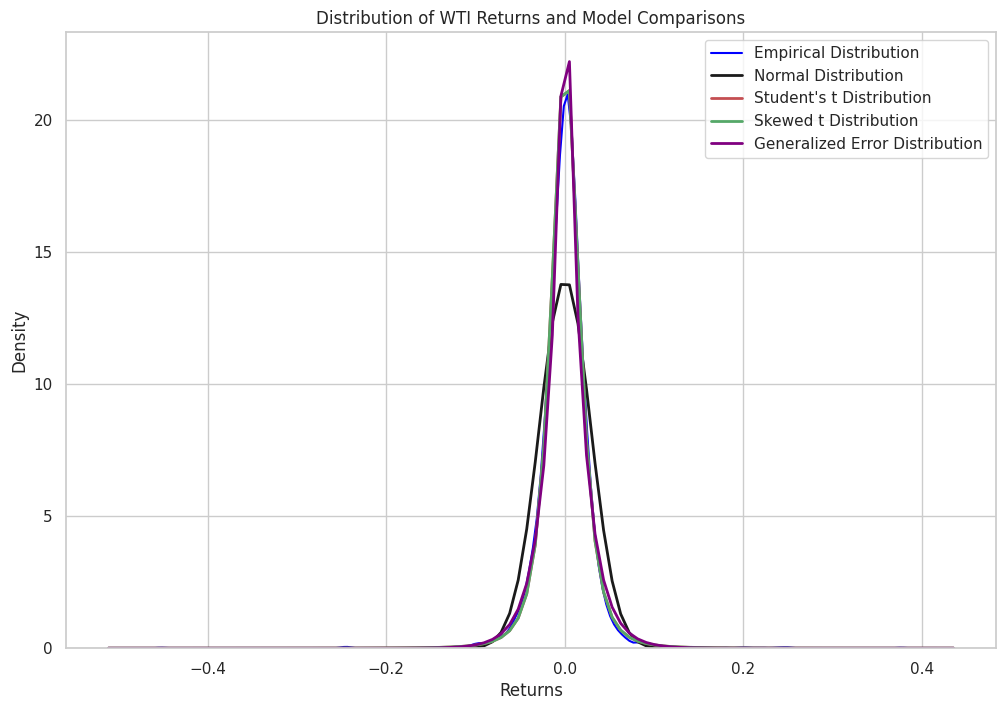

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.kdeplot(WTI_returns, label='Empirical Distribution', color='blue')

# norm
mu, std = norm.fit(WTI_returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

#  t
params_t = t.fit(WTI_returns)
p_t = t.pdf(x, *params_t)
plt.plot(x, p_t, 'r', linewidth=2, label='Student\'s t Distribution')

# skewt
params_skewt = sm.OLS(WTI_returns, sm.add_constant(np.arange(len(WTI_returns)))).fit().params
p_skewt = t.pdf(x, *params_t)  # Adapt the t dist for the skewt
plt.plot(x, p_skewt, 'g', linewidth=2, label='Skewed t Distribution')


#  ged
params_ged = gennorm.fit(WTI_returns)
p_ged = gennorm.pdf(x, *params_ged)
plt.plot(x, p_ged, 'purple', linewidth=2, label='Generalized Error Distribution')

plt.title('Distribution of WTI Returns and Model Comparisons')
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

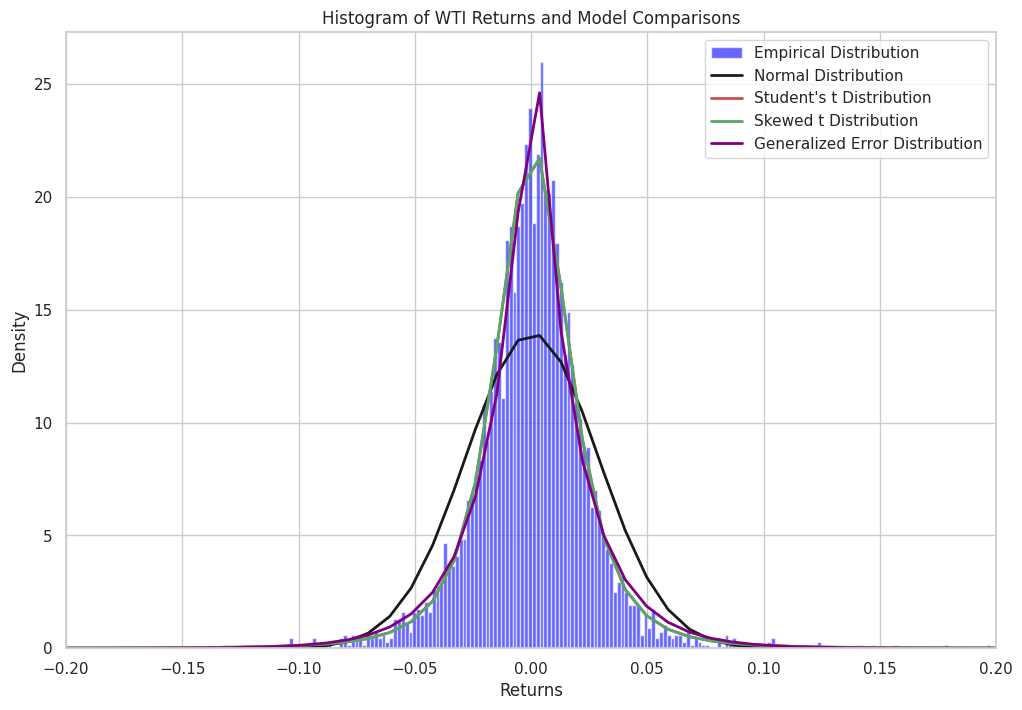

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


plt.hist(WTI_returns, bins=500, density=True, alpha=0.6, color='blue', label='Empirical Distribution')

# norm
mu, std = norm.fit(WTI_returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

#  t
params_t = t.fit(WTI_returns)
p_t = t.pdf(x, *params_t)
plt.plot(x, p_t, 'r', linewidth=2, label='Student\'s t Distribution')

# skewt
params_skewt = sm.OLS(WTI_returns, sm.add_constant(np.arange(len(WTI_returns)))).fit().params
p_skewt = t.pdf(x, *params_t)
plt.plot(x, p_skewt, 'g', linewidth=2, label='Skewed t Distribution')

# ged
params_ged = gennorm.fit(WTI_returns)
p_ged = gennorm.pdf(x, *params_ged)
plt.plot(x, p_ged, 'purple', linewidth=2, label='Generalized Error Distribution')

plt.title('Histogram of WTI Returns and Model Comparisons')
plt.xlim(-0.2,0.2)
plt.xlabel('Returns')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 4.7 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
from scipy.stats import genextreme

In [ ]:
WTI_split_index = int(len(WTI_returns) * 0.75)
WTI_estimation_set = WTI_returns[:WTI_split_index]
WTI_forecast_set = WTI_returns[WTI_split_index:]

In [ ]:
tgarch_model = arch_model(WTI_estimation_set, vol='Garch', p=1, q=1, dist='ged',power=1.0)
gjrgarch_model = arch_model(WTI_estimation_set, vol='Garch', p=1, o=1, q=1, dist='ged')
egarch_model = arch_model(WTI_estimation_set, vol='EGARCH', p=1, q=1, dist='ged')
figarch_model = arch_model(WTI_estimation_set, vol='FIGARCH', p=1, q=1, dist='ged')


models = [tgarch_model, gjrgarch_model,  egarch_model, figarch_model,aparch_model ]
model_names = ['TGARCH(1,1)', 'GJRGARCH(1,1)', 'FIGARCH(1,1)', 'EGARCH(1,1)','APARCH(1,1)']


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005793. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


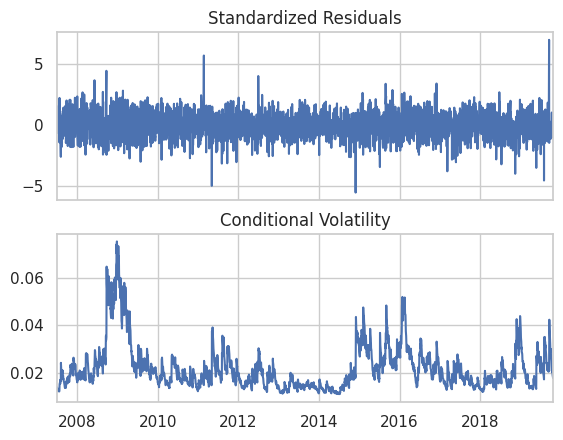

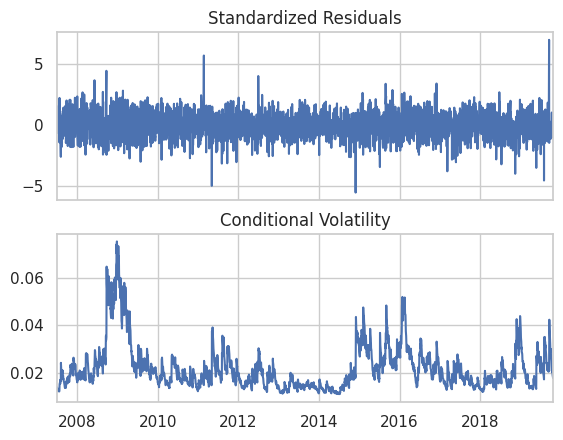

In [ ]:
result_gjf = gjrgarch_model.fit(disp='off')
result_gjf.plot()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005793. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


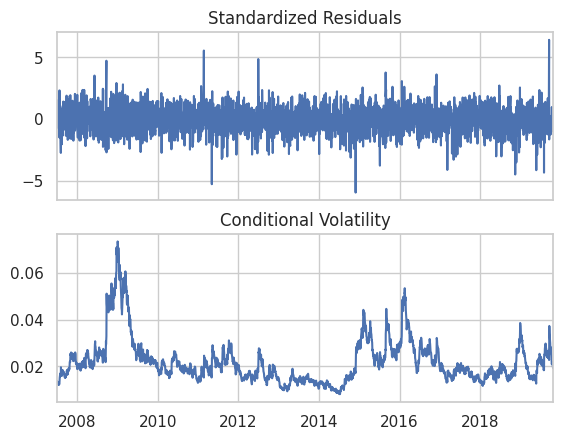

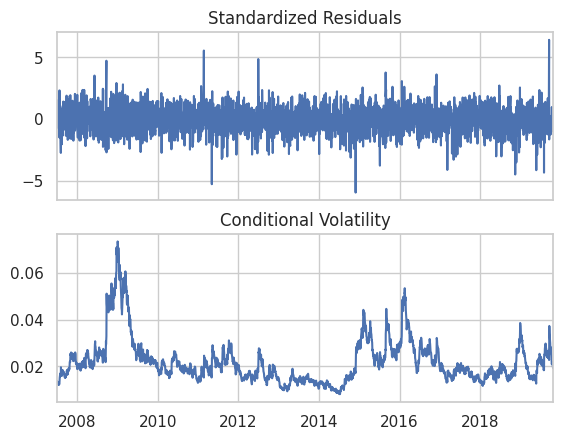

In [ ]:
result_eg = egarch_model.fit(disp='off')
result_eg.plot()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005793. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/distribution.py:1194: RuntimeWarning: overflow encountered in power
  lls -= 0.5 * abs(resids / (sqrt(sigma2) * c)) ** nu


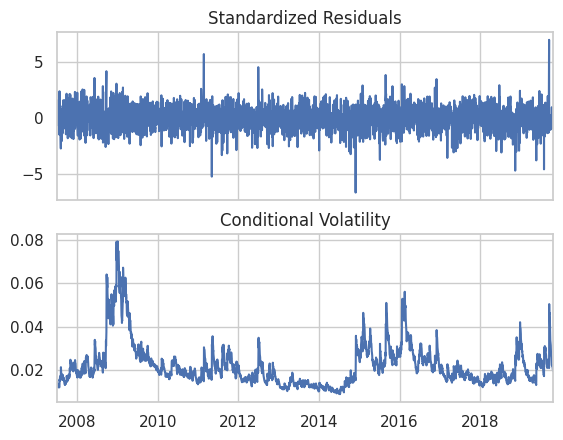

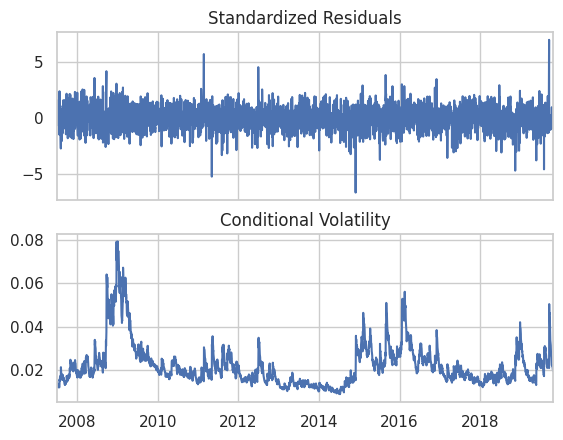

In [ ]:
result_fi = figarch_model.fit(disp='off')
result_fi.plot()

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005793. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


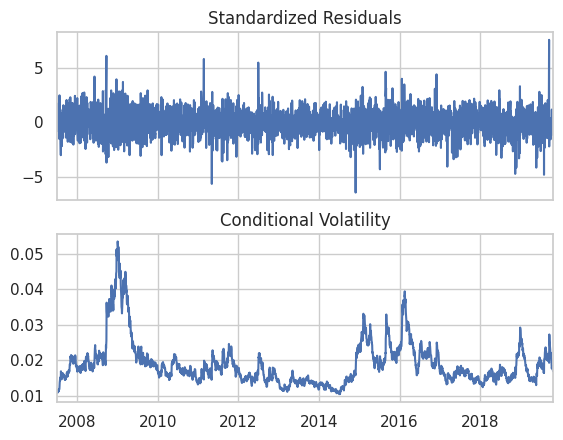

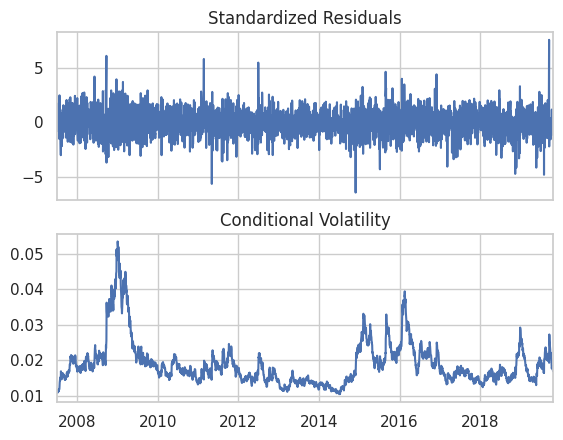

In [ ]:
result_t = tgarch_model.fit(disp='off')
result_t.plot()

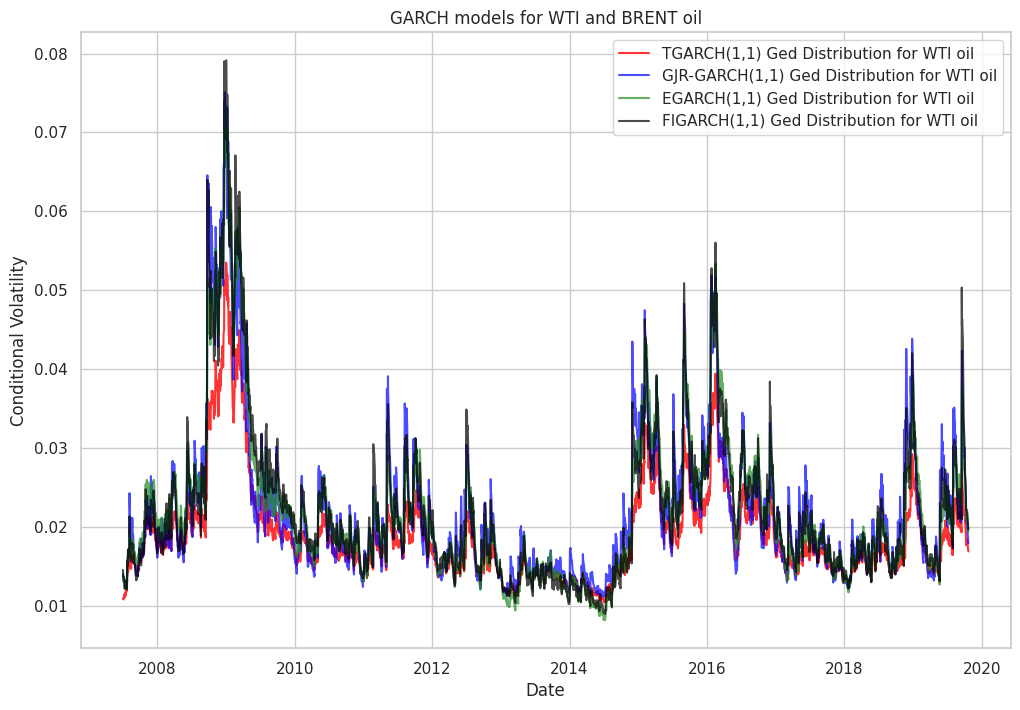

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(result_t.conditional_volatility.index, result_t.conditional_volatility, color='red',alpha=0.8, label='TGARCH(1,1) Ged Distribution for WTI oil')
plt.plot(result_gjf.conditional_volatility.index, result_gjf.conditional_volatility, color='blue',alpha=0.7, label='GJR-GARCH(1,1) Ged Distribution for WTI oil')
plt.plot(result_eg.conditional_volatility.index, result_eg.conditional_volatility, color='forestgreen',alpha=0.7, label='EGARCH(1,1) Ged Distribution for WTI oil')
plt.plot(result_fi.conditional_volatility.index, result_fi.conditional_volatility, color='black',alpha=0.7, label='FIGARCH(1,1) Ged Distribution for WTI oil')

plt.title('GARCH models for WTI and BRENT oil')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.grid(True)
plt.legend()
plt.show()

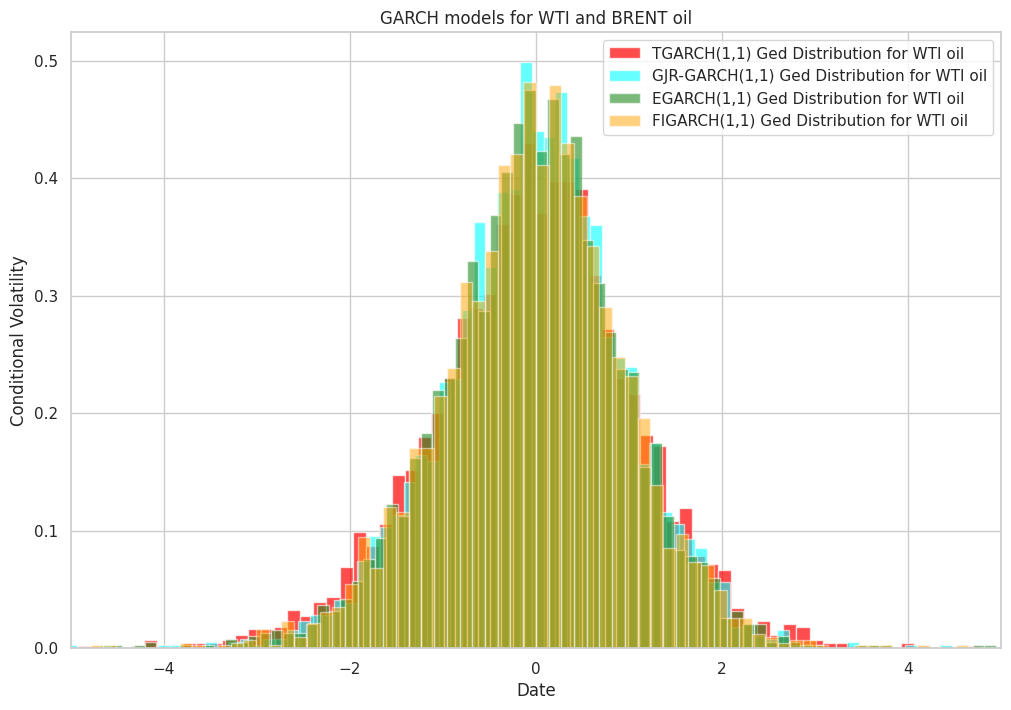

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist( result_t.std_resid, color='red',alpha=0.7, label='TGARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)
plt.hist( result_gjf.std_resid, color='cyan',alpha=0.6, label='GJR-GARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)
plt.hist( result_eg.std_resid, color='forestgreen',alpha=0.6, label='EGARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)
plt.hist( result_fi.std_resid, color='orange',alpha=0.5, label='FIGARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)

plt.title('GARCH models for WTI and BRENT oil')
plt.xlim(-5,5)
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from scipy.stats import norm

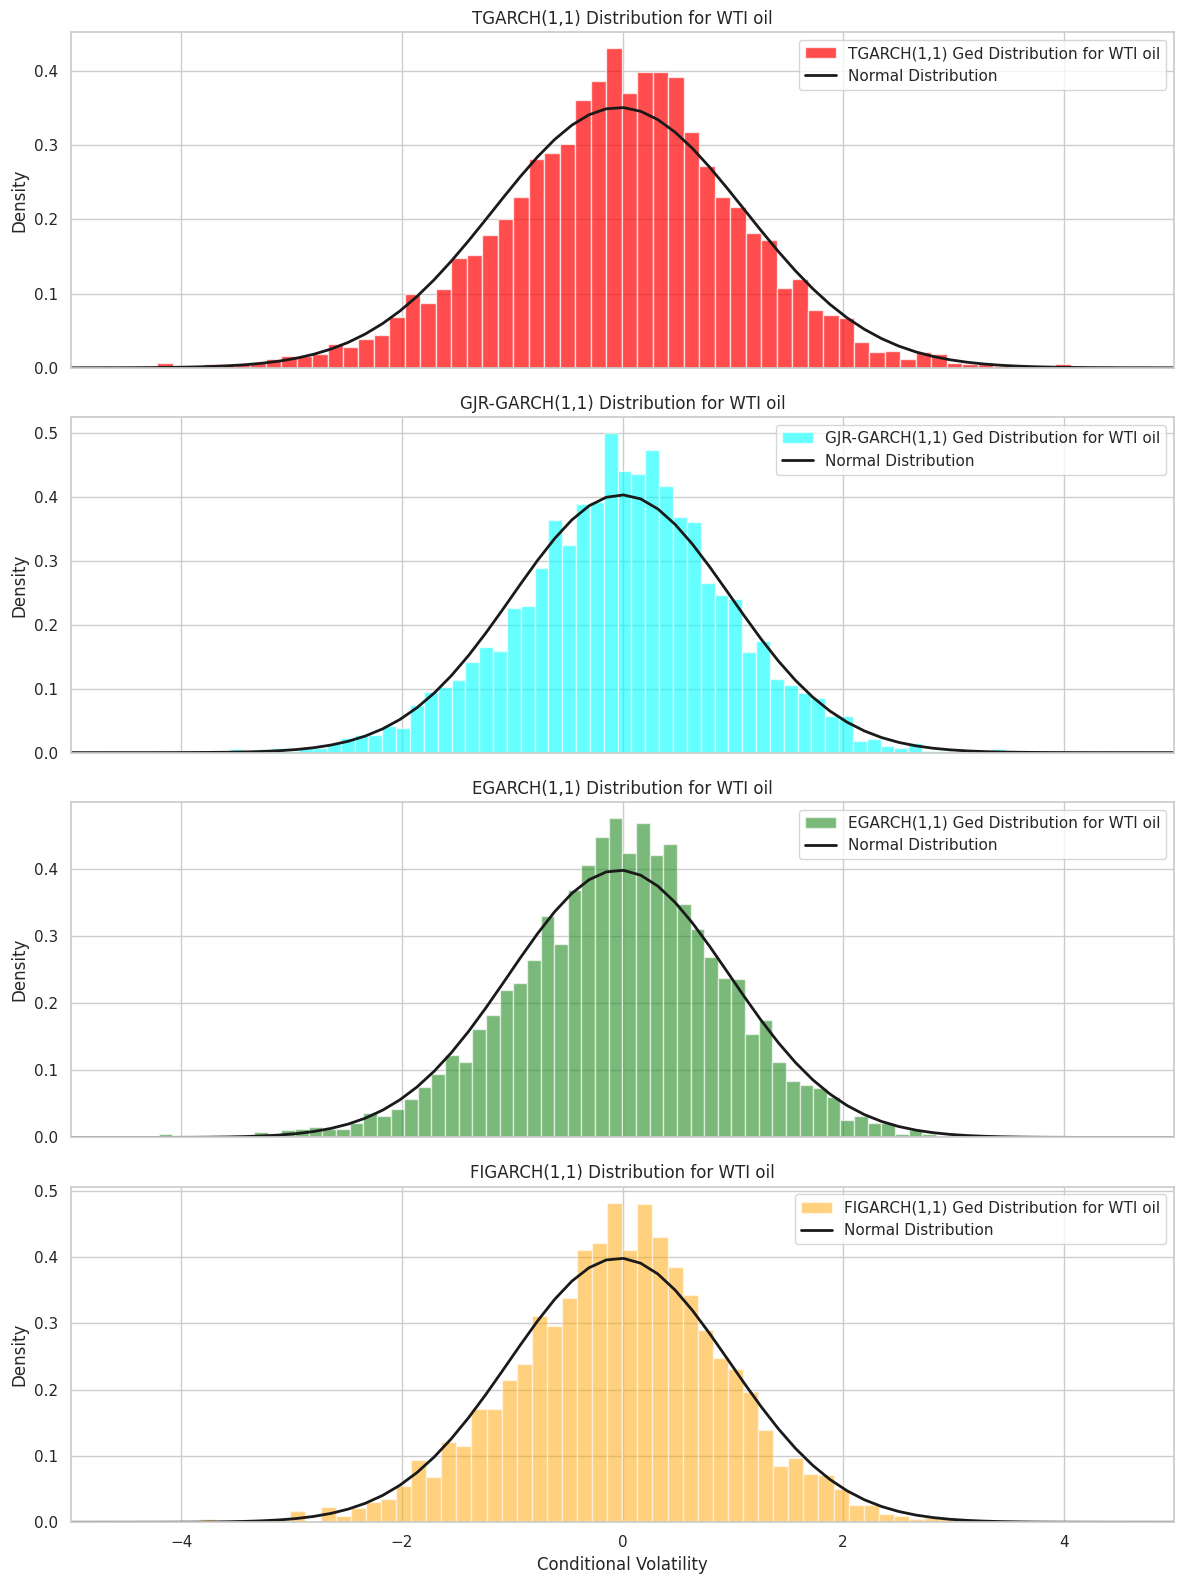

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

#  TGARCH
axs[0].hist(result_t.std_resid, color='red', alpha=0.7, label='TGARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)
xmin, xmax = axs[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, result_t.std_resid.mean(), result_t.std_resid.std())
axs[0].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
axs[0].set_title('TGARCH(1,1) Distribution for WTI oil')
axs[0].set_ylabel('Density')
axs[0].legend()

#  GJR-GARCH
axs[1].hist(result_gjf.std_resid, color='cyan', alpha=0.6, label='GJR-GARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)
p = norm.pdf(x, result_gjf.std_resid.mean(), result_gjf.std_resid.std())
axs[1].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
axs[1].set_title('GJR-GARCH(1,1) Distribution for WTI oil')
axs[1].set_ylabel('Density')
axs[1].legend()

#  EGARCH
axs[2].hist(result_eg.std_resid, color='forestgreen', alpha=0.6, label='EGARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)
p = norm.pdf(x, result_eg.std_resid.mean(), result_eg.std_resid.std())
axs[2].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
axs[2].set_title('EGARCH(1,1) Distribution for WTI oil')
axs[2].set_ylabel('Density')
axs[2].legend()

#  FIGARCH
axs[3].hist(result_fi.std_resid, color='orange', alpha=0.5, label='FIGARCH(1,1) Ged Distribution for WTI oil', bins=100, density=True)
p = norm.pdf(x, result_fi.std_resid.mean(), result_fi.std_resid.std())
axs[3].plot(x, p, 'k', linewidth=2, label='Normal Distribution')
axs[3].set_title('FIGARCH(1,1) Distribution for WTI oil')
axs[3].set_xlabel('Conditional Volatility')
axs[3].set_ylabel('Density')
axs[3].legend()

plt.xlim(-5, 5)
plt.tight_layout()
plt.show()

In [ ]:
print(result_t.summary())

                          Constant Mean - AVGARCH Model Results                           
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                AVGARCH   Log-Likelihood:                7657.01
Distribution:      Generalized Error Distribution   AIC:                          -15304.0
Method:                        Maximum Likelihood   BIC:                          -15273.8
                                                    No. Observations:                 3097
Date:                            Mon, Dec 04 2023   Df Residuals:                     3096
Time:                                    17:52:07   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
---------------------------

In [ ]:
print(result_eg.summary())

                           Constant Mean - EGARCH Model Results                           
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                 EGARCH   Log-Likelihood:                7717.45
Distribution:      Generalized Error Distribution   AIC:                          -15424.9
Method:                        Maximum Likelihood   BIC:                          -15394.7
                                                    No. Observations:                 3097
Date:                            Mon, Dec 04 2023   Df Residuals:                     3096
Time:                                    17:52:02   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
---------------------------

In [ ]:
print(result_gjf.summary())

                         Constant Mean - GJR-GARCH Model Results                          
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                              GJR-GARCH   Log-Likelihood:                7724.14
Distribution:      Generalized Error Distribution   AIC:                          -15436.3
Method:                        Maximum Likelihood   BIC:                          -15400.1
                                                    No. Observations:                 3097
Date:                            Mon, Dec 04 2023   Df Residuals:                     3096
Time:                                    17:52:00   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-------------------------

In [ ]:
print(result_fi.summary())

                          Constant Mean - FIGARCH Model Results                           
Dep. Variable:                          Adj Close   R-squared:                       0.000
Mean Model:                         Constant Mean   Adj. R-squared:                  0.000
Vol Model:                                FIGARCH   Log-Likelihood:                7714.68
Distribution:      Generalized Error Distribution   AIC:                          -15417.4
Method:                        Maximum Likelihood   BIC:                          -15381.1
                                                    No. Observations:                 3097
Date:                            Mon, Dec 04 2023   Df Residuals:                     3096
Time:                                    17:52:05   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
---------------------------